In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from PIL import Image
from matplotlib import pyplot
import numpy as np
import matplotlib
import cv2
import scipy.signal
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
import pandas as pd

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/MinorProject/model.h5')

In [ ]:
classes = ["क","ख","ग","घ","ङ","च","छ","ज","झ","ञ","ट","ठ","ड","ढ","ण","त","थ","द","ध","न","प","फ","ब","भ","म","य","र","ल","व","श","ष","स","ह","क्ष","त्र","ज्ञ","०","१","२","३","४","५","६","७","८","९"]

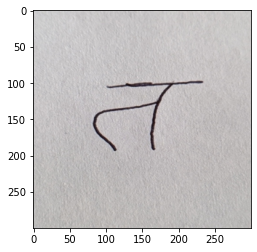

In [ ]:
image =  Image.open('/content/drive/MyDrive/MinorProject/sample/39.jpg')
# image = Image.open('/content/viber_image_2023-02-26_00-00-21-408.jpg')
image = image.resize((300, 300))
pyplot.imshow(image)
pyplot.show()

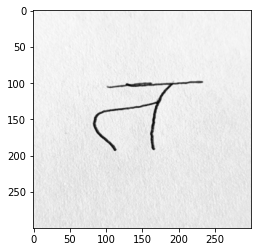

In [ ]:
image_data = np.array(image)
grayscale = np.zeros((image_data.shape[0], image_data.shape[1]))
for i in range(len(image_data)):
    for j in range(len(image_data[i])):
        grayscale[i][j] = image_data[i][j][0]/3 + image_data[i][j][1]/3 + image_data[i][j][2]/3
pyplot.imshow(grayscale, cmap = matplotlib.cm.Greys_r)

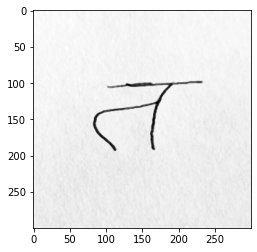

In [ ]:
def non_linear_median_filter(image, kernel_size=5):
    rows, cols = image.shape
    result = np.zeros_like(image)

    for i in range(rows):
        for j in range(cols):
            i_min = max(0, i - (kernel_size // 2))
            i_max = min(rows, i + (kernel_size // 2) + 1)
            j_min = max(0, j - (kernel_size // 2))
            j_max = min(cols, j + (kernel_size // 2) + 1)
            window = image[i_min:i_max, j_min:j_max]

            # Compute IPP ratings for each pixel in the window
            # (for simplicity, a constant IPP rating is used here)
            ipp_ratings = np.ones_like(window)

            # Weighted median calculation
            sorted_window = np.sort(window.flatten())
            weights = np.cumsum(ipp_ratings.flatten())
            median_index = np.searchsorted(weights, weights[-1] / 2)
            result[i, j] = sorted_window[median_index]

    return result

image_data = non_linear_median_filter(grayscale, 3)
pyplot.imshow(image_data, cmap=matplotlib.cm.Greys_r)

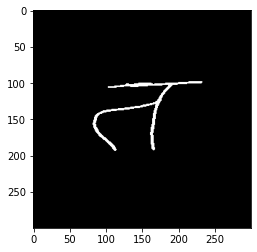

In [ ]:
def binarized(image_data):
    row, column = image_data.shape
    for i in range(row):
        for j in range(column):
            if image_data[i][j] > 127 :
                image_data [i][j] = 0
            else:
                image_data[i][j] = 255
    
    return image_data
inverted_binarized_image = binarized(image_data)
np.set_printoptions(linewidth = 320, edgeitems=10)
pyplot.imshow(inverted_binarized_image, cmap = matplotlib.cm.Greys_r)

98 82 193 232


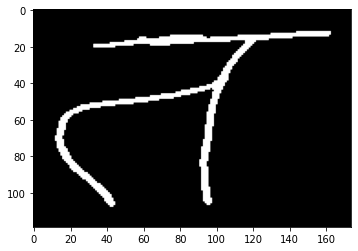

In [ ]:
def universe_of_discourse(image_data):
    row , column = len(image_data), len(image_data[0])
    def minimumrow():
        for i in range(row):
            for j in range(column):
                if image_data[i+5,j] == 255:
                    min_row = i+5
                    return min_row
    def minimumcolumn():
        for i in range(column):
            for j in range(row):
                if image_data[j,i+5] == 255:
                    min_column = i+5
                    return min_column
    def maximumrow(row, column):
            i=0
            while(1):
                row=row-1
                for i in range(column):
                    if image_data[row-5, i] == 255:
                        return row-5

    def maximumcolumn(row, column):
            i=0
            while(1):
                column = column -1
                for i in range(row):
                    if image_data[i, column-5] == 255:
                        return column-5
    min_row, min_column, max_row, max_column = int(minimumrow()), int(minimumcolumn()), int(maximumrow(row, column)), int(maximumcolumn(row, column))
    print(min_row, min_column, max_row, max_column)
    if min_row>=row//25:
        min_row = min_row - row//25
    if min_column>=column//25:
        min_column = min_column - column//25
    if max_row < 24*row//25:
        max_row = max_row + row//25
    if max_column < 24*column//25:
        max_column = max_column + column//25

    image_data = image_data[min_row:max_row, min_column:max_column]
    pyplot.imshow(image_data, cmap = matplotlib.cm.Greys_r)
    return image_data
cropped_image = universe_of_discourse(inverted_binarized_image)

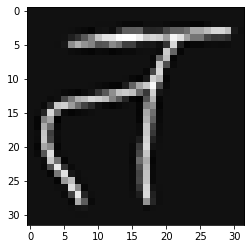

In [ ]:
im = Image.fromarray(cropped_image)
normalized_image = im.resize((32, 32))

normalized_image_data = np.array(normalized_image)
pyplot.imshow(normalized_image_data, cmap = matplotlib.cm.Greys_r)

In [ ]:
normalized_image_data = normalized_image_data/255.0
normalized_image_data = normalized_image_data.reshape(1,32,32,1)
predictions = model.predict(normalized_image_data)
print(classes[np.argmax(predictions)])

1/1 [==============================] - 0s 437ms/step
त
